# Data Cleaning

## Outline
1. Handle missing values
   - Identify columns with missing data
   - Decide on appropriate strategies for each column
   - Impute or handle missing values as needed
2. Convert data types
   - Change 'start_date' to datetime format
   - Convert 'home_line_scores' and 'away_line_scores' to usable format
3. Handle outliers
   - Check for and address unrealistic values in numerical columns
4. Create derived features
   - Calculate point difference
   - Generate 'winner' column
   - Create time-based features from 'start_date'
5. Review and validate cleaned dataset

In [4]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the games data from the parquet file
games_df = pd.read_parquet('../data/games.parquet')

# Display the first few rows and basic information about the dataset
print(games_df.info())


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Matplotlib is building the font cache; this may take a moment.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7256 non-null   int64  
 1   season              7256 non-null   int64  
 2   week                7256 non-null   int64  
 3   season_type         7256 non-null   object 
 4   start_date          7256 non-null   object 
 5   start_time_tbd      7256 non-null   bool   
 6   completed           7256 non-null   bool   
 7   neutral_site        7256 non-null   bool   
 8   conference_game     7256 non-null   bool   
 9   attendance          1676 non-null   float64
 10  venue_id            7235 non-null   float64
 11  venue               7235 non-null   object 
 12  home_id             7256 non-null   int64  
 13  home_team           7256 non-null   object 
 14  home_conference     7225 non-null   object 
 15  home_division       7225 non-null   object 
 16  home_p

Columns with null values:
attendance: 5580 null values (76.90%)
venue_id: 21 null values (0.29%)
venue: 21 null values (0.29%)
home_conference: 31 null values (0.43%)
home_division: 31 null values (0.43%)
home_points: 15 null values (0.21%)
home_line_scores: 15 null values (0.21%)
home_post_win_prob: 4398 null values (60.61%)
home_pregame_elo: 5536 null values (76.30%)
home_postgame_elo: 5536 null values (76.30%)
away_conference: 115 null values (1.58%)
away_division: 115 null values (1.58%)
away_points: 15 null values (0.21%)
away_line_scores: 15 null values (0.21%)
away_post_win_prob: 4398 null values (60.61%)
away_pregame_elo: 5772 null values (79.55%)
away_postgame_elo: 5772 null values (79.55%)
excitement_index: 4388 null values (60.47%)
highlights: 7256 null values (100.00%)
notes: 7134 null values (98.32%)


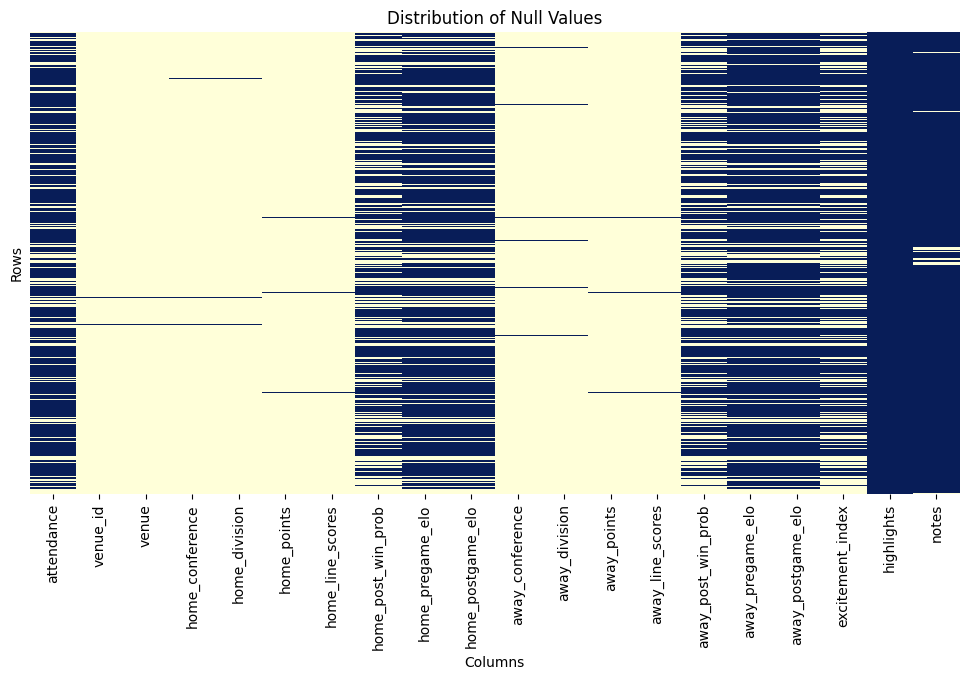

In [12]:
# Check for columns with null values
null_columns = games_df.columns[games_df.isnull().any()].tolist()

print("Columns with null values:")
for col in null_columns:
    null_count = games_df[col].isnull().sum()
    null_percentage = (null_count / len(games_df)) * 100
    print(f"{col}: {null_count} null values ({null_percentage:.2f}%)")

# Visualize the distribution of null values
plt.figure(figsize=(12, 6))
sns.heatmap(games_df[null_columns].isnull(), cbar=False, yticklabels=False, cmap='YlGnBu')
plt.title('Distribution of Null Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

## Notes

-   We have a few columns where the vast majority of the values are null.
    -   attendance, home_post_win_prob, home_pregame_elo, home_postgame_elo, away_post_win_prob, away_pregame_elo, away_postgame_elo, excitement_index, highlights, notes
    -   highlights (100%): remove
    -   notes (98%): remove, mostly some minor notes like change of date or what championship game it is. Strange since our initial data pull is supposed to be regular season only.
    -   

In [7]:
# Display a random sample of non-null notes
non_null_notes = games_df[games_df['notes'].notnull()]
if not non_null_notes.empty:
    sample_size = min(5, len(non_null_notes))
    print(f"Random sample of {sample_size} non-null notes:")
    print(non_null_notes[['season', 'week', 'home_team', 'away_team', 'notes']].sample(sample_size))
else:
    print("No non-null notes found in the dataset.")


Random sample of 5 non-null notes:
      season  week       home_team          away_team  \
1563    2022     6             UCF                SMU   
3623    2022    14             TCU       Kansas State   
3441    2022    12  St. Johns (MN)  Northwestern (MN)   
3580    2022    13   New Hampshire            Fordham   
7248    2023    14           Texas     Oklahoma State   

                                        notes  
1563                         Moved from Oct 1  
3623            Dr Pepper Big 12 Championship  
3441  Division III Championship - First Round  
3580           FCS Championship - First Round  
7248            Dr Pepper Big 12 Championship  
